In [1]:
# Import the random module.
import random

# Import the numpy module.
import numpy as np

# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

In [2]:
time_interval = 1000  # Specifies the total number of cycles or time interval

In [4]:
def strong_signal_generator(num_cycle):
    rate = np.random.randint(low=1,high=21)
    signals = np.array([])  # Initialize an empty numpy array to store the signals

    for i in range(0, num_cycle, rate):  # Iterate over the cycles with the given rate
        curr_bit = np.random.randint(low=0, high=10)  # Generate a random bit (0 or 1)

        if i + rate > num_cycle:
            repeat_time = num_cycle - i  # Calculate the remaining cycles if less than the given rate
        else:
            repeat_time = rate  # Use the given rate if enough cycles are remaining

        for _ in range(repeat_time):  # Repeat the current bit for the calculated number of cycles
            signals = np.append(signals, curr_bit)  # Append the current bit to the signals array

    return signals  # Return the generated signals

In [5]:
def generate_signal(num_cycle):
    rate = np.random.randint(low=1,high=21)
    signals = np.array([])  # Initialize an empty numpy array to store the signals

    for i in range(0, num_cycle, rate):  # Iterate over the cycles with the given rate
        curr_bit = np.random.randint(low=0, high=2)  # Generate a random bit (0 or 1)

        if i + rate > num_cycle:
            repeat_time = num_cycle - i  # Calculate the remaining cycles if less than the given rate
        else:
            repeat_time = rate  # Use the given rate if enough cycles are remaining

        for _ in range(repeat_time):  # Repeat the current bit for the calculated number of cycles
            signals = np.append(signals, curr_bit)  # Append the current bit to the signals array

    return signals  # Return the generated signals

In [7]:
def filter_jammer_bits(result_bits):
    filtered_bit = np.array([])  # Initialize an empty array to store the filtered bits

    for i in range(len(result_bits)):
        if result_bits[i] == 2:  # If the result bit is 2 (jammer signal)
            filtered_bit = np.append(filtered_bit, 1)  # Append 1 to the filtered bits array
        elif result_bits[i] == 0:  # If the result bit is 0 (non-jammer signal)
            filtered_bit = np.append(filtered_bit, 0)  # Append 0 to the filtered bits array
        elif result_bits[i] == 1:  # If the result bit is 1
            if result_bits[i-1] == 2:  # If the previous result bit is 2 (jammer signal)
                filtered_bit = np.append(filtered_bit, 0)  # Append 0 to the filtered bits array
            elif result_bits[i-1] == 0:  # If the previous result bit is 0 (non-jammer signal)
                filtered_bit = np.append(filtered_bit, 1)  # Append 1 to the filtered bits array
            else:  # If the previous result bit is 1
                filtered_bit = np.append(np.random.randint(low=0,high=2))  # Append 3 to the filtered bits array

    return filtered_bit  # Return the filtered bits array


In [8]:
# Generate strong jammer signals using the specified jamming rate and time interval
strong_signal_jammer = strong_signal_generator(time_interval)

# Generate sender signals using the specified sender rate and time interval
sender_signal = generate_signal(time_interval)

# Calculate the result signals by summing the sender signals and jammer signals
mixed_signal = sender_signal + strong_signal_jammer

# Filter out the jammer signals and obtain the filtered sender signals
# processed_signal = filter_jammer_bits(mixed_signal)

In [13]:
def draw_summary_strong_jammer(jammer_signal, sender_signal, mixed_signal, time_interval):
    # Create a figure with subplots
    fig, axs = plt.subplots(figsize=(20, 6))
    fig.suptitle(f'{time_interval} Cycles - Result')

    # Create x-axis values
    t = np.linspace(start=0, stop=time_interval, num=time_interval, dtype=int)

    # Plot the mixed signals (Jammer_vs_Sender)
    axs.plot(t, mixed_signal, label="Mixed")
    axs.plot(t, jammer_signal, label="Jammer")
    axs.plot(t, sender_signal, label="Sender")
    axs.set_xlabel("Time Cycle")
    axs.set_ylabel("Strength")
    axs.legend(loc='upper right')
    axs.set_title("Jammer vs Sender")

    # Display the plot
    plt.show()


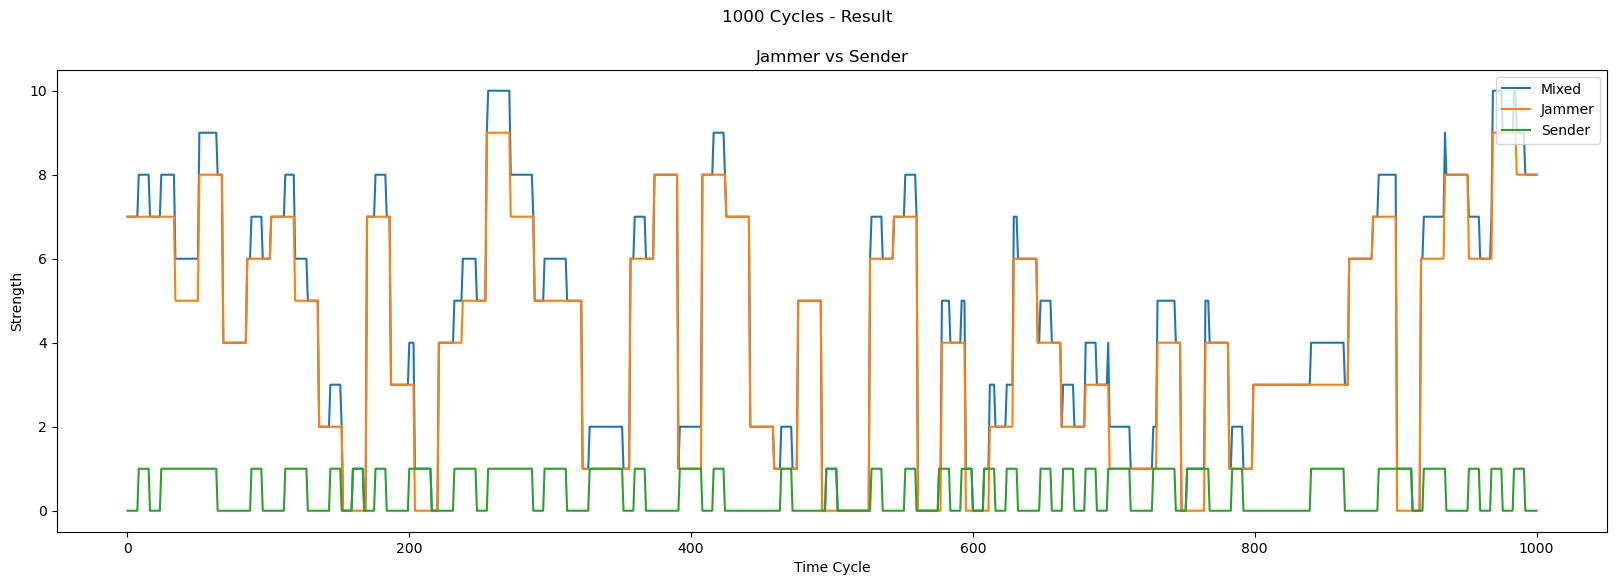

In [14]:
# Call the draw_summary function
draw_summary_strong_jammer(strong_signal_jammer, sender_signal, mixed_signal, time_interval)